In [27]:
## Import manifold libraries
from sklearn import manifold
from sklearn.metrics import euclidean_distances


In [28]:
'''Swiss Roll dataset is a 3D dataset that is often used to test manifold learning algorithms. 
It is generated using the make_swiss_roll() function. 
The following code generates a Swiss Roll dataset with 1000 samples and noise of 0.2.'''
## create swiss roll data
from sklearn.datasets import make_swiss_roll
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [29]:
'''3 Dimensional X and single column vector color created with calling make_swiss_roll() function.'''
##shape of data
print("Shape of X: ", X.shape)
print("Shape of color: ", color.shape) # Single column vector

Shape of X:  (1000, 3)
Shape of color:  (1000,)


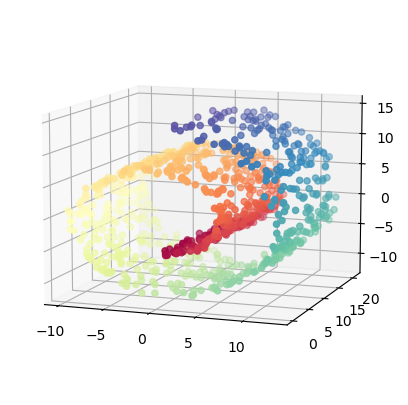

In [30]:
## Visualize all 3 dimensions of swiss roll data
import matplotlib.pyplot as plt ## importing the plotting module
from mpl_toolkits.mplot3d import Axes3D ## importing the 3d plotting module
import time

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=color, cmap=plt.cm.Spectral)
ax.view_init(10, -70)
plt.show()



In [31]:
'''Manifold learning helps us to reduce the dimensionality of data while preserving the essential geometry of the data.
As we examine in next cell, manifold algorighms preserve the structure of the data, which is often a lower-dimensional with
eigenvalues and eigenvectors.
'''

'Manifold learning helps us to reduce the dimensionality of data while preserving the essential geometry of the data.\nAs we examine in next cell, manifold algorighms preserve the structure of the data, which is often a lower-dimensional with\neigenvalues and eigenvectors.\n'

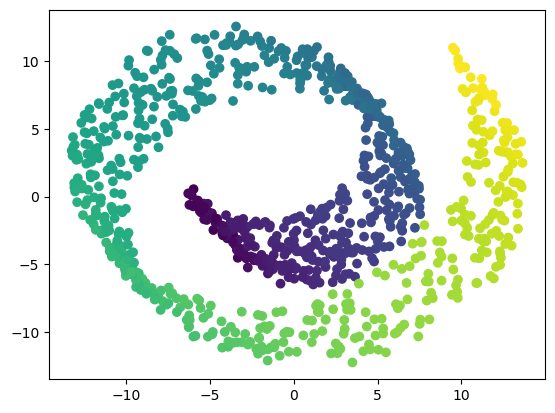

In [32]:
'''PCA is a dimensionality reduction technique that can be used to reduce the dimensionality of highly correlated features.
It is an unsupervised algorithm that is used for feature extraction. It is used to reduce the number of features in a dataset.
Eigenvalues and eigenvectors are the mathematical concepts that are used in PCA for dimensionality reduction.
'''
## Importing sklearn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
#plot x_train
plt.scatter(X_pca[:,0],X_pca[:,1],c=color)


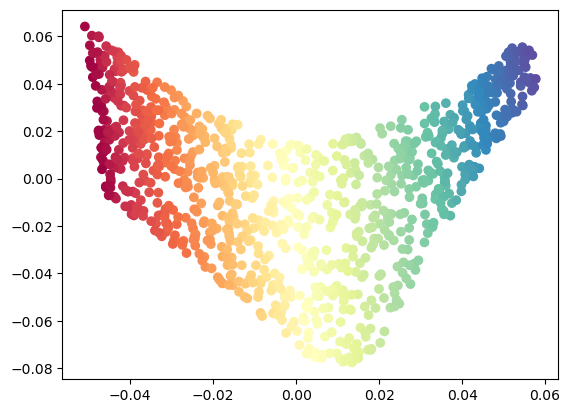

In [33]:
'''LLE is another dimensionality reduction method to project data to a lower dimension.
It is a nonlinear dimensionality reduction technique based on the assumption that the data lies on a low-dimensional manifold.
Eigenvalue decomposition is used to find the low-dimensional, neighborhood preserving representation of the data.'''
# LLE algorithm
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
lle.fit(X)
X_lle = lle.transform(X)
# Plot the result
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)


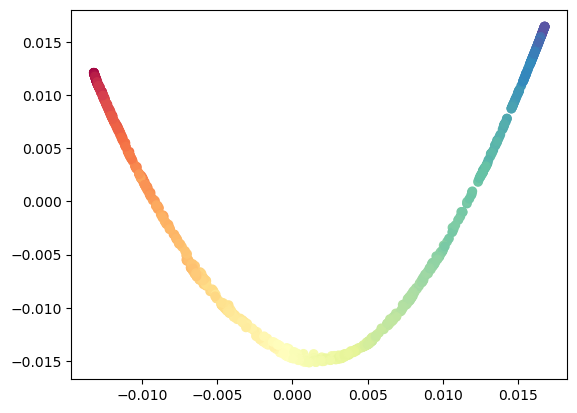

In [34]:
'''LE(Spectral Embedding) is also a manifold learning algorithm that reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is particularly good at unrolling twisted manifolds, especially when there is not too much noise.'''''
## Le - Spectral Embedding
from sklearn.manifold import SpectralEmbedding
le = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_le = le.fit_transform(X)
# Plot the result
plt.scatter(X_le[:, 0], X_le[:, 1], c=color, cmap=plt.cm.Spectral)

/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


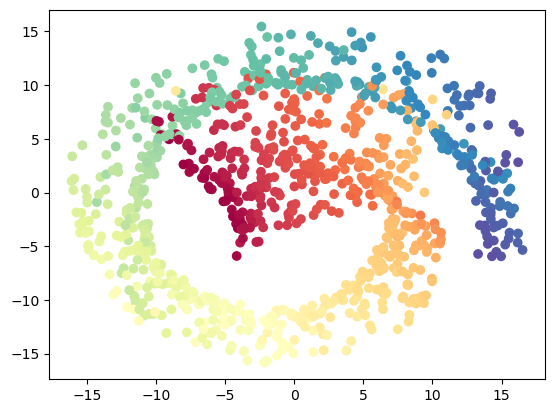

In [35]:
'''MDS is another linear manifold learning algorithm that tries to preserve the distances between the points in the original and embedded space.
It is similar with PCA, but it tries to preserve the distances between all the points in the original and embedded space, while PCA only preserves the distances between the points and the origin.'''
# MDS algorithm
mds = manifold.MDS(n_components=2, max_iter=100, n_init=1)
X_mds = mds.fit_transform(X)
#plot the result
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)

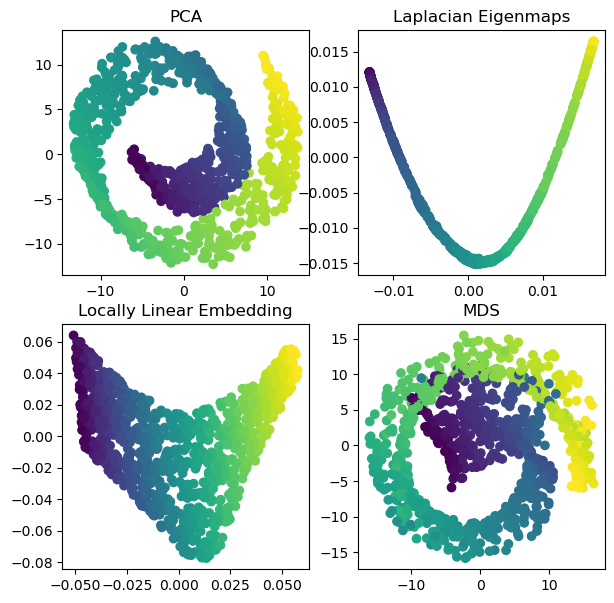

In [36]:
## Plot all embeddings X_pca,X_le,X_lle,X_mds

plt.figure(figsize=(7, 7))
plt.subplot(2,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=color)
plt.title('PCA')
plt.subplot(2,2,2)
plt.scatter(X_le[:,0],X_le[:,1],c=color)
plt.title('Laplacian Eigenmaps')
plt.subplot(2,2,3)
plt.scatter(X_lle[:,0],X_lle[:,1],c=color)
plt.title('Locally Linear Embedding')
plt.subplot(2,2,4)
plt.scatter(X_mds[:,0],X_mds[:,1],c=color)
plt.title('MDS')
plt.show()



In [37]:
# Appeding the path to the scaman package
import sys
sys.path.append('/Users/berke/Codes/scaman/scaman')

In [38]:
## Using scaman with same data
from serial.pca import PCA
from serial.le import LE
from serial.lle import LLE
from serial.mds import MDS


Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 1
Solution method: krylovschur
Number of requested eigenvalues: 2
Stopping condition: tol=0.001, maxit=100
Number of converged eigenpairs 3

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
    52.523977        7.6012e-17
    38.895068       7.39019e-17
    37.371762       4.44676e-17

Time taken to compute eigenvalues: 0.0005 seconds


/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


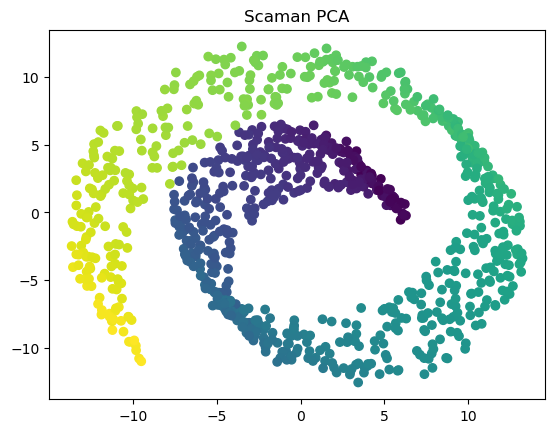

In [45]:
# Scaman PCA
scaman_pca = PCA(n_components=2,eig_method='slepc')
X_pca_scaman = scaman_pca.fit_transform(X)
# plot
plt.scatter(X_pca_scaman[:,0],X_pca_scaman[:,1],c=color)
plt.title('Scaman PCA') 
plt.show()



Weights Shape:
 (1000, 1000)


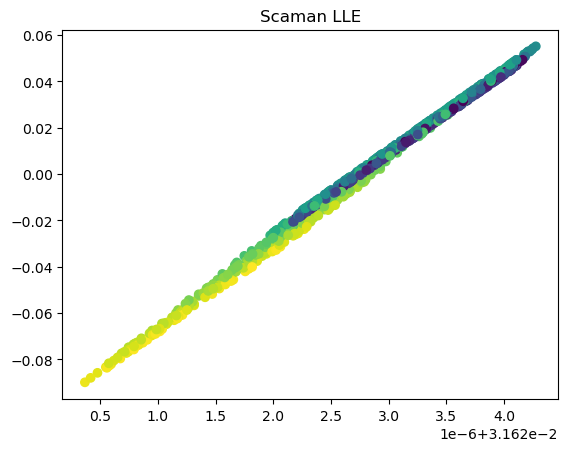

In [71]:
# Scaman LLE
scaman_lle = LLE(n_components=2, n_neighbors=10,solver='numpy')
X_lle_scaman = scaman_lle.fit_transform(X)
plt.scatter(X_lle_scaman[:,0], X_lle_scaman[:,1], c=color)
plt.title('Scaman LLE')
plt.show()

Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 158
Solution method: krylovschur
Number of requested eigenvalues: 2
Stopping condition: tol=1e-09, maxit=10000
Number of converged eigenpairs 5

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
     0.000000           161.851
     0.000834       8.50024e-12
     0.003389       2.09922e-12
     0.008075       7.86736e-13
     0.008677       3.15928e-12



/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


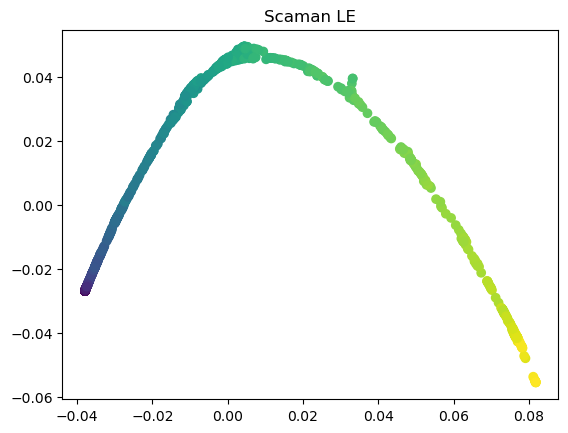

In [52]:
# Scaman LE
scaman_le = LE(data =X,n_components=2,k=10,solver='slepc',slepc_solver='KRYLOVSCHUR',normalize=False)
X_le_scaman = scaman_le.fit_transform()
plt.scatter(X_le_scaman[:,0],X_le_scaman[:,1],c=color)
plt.title('Scaman LE')
plt.show()

Petsc matrix formed

******************************
*** SLEPc Solution Results ***
******************************

Number of iterations of the method: 1
Solution method: krylovschur
Number of requested eigenvalues: 2
Stopping condition: tol=1e-09, maxit=1000
Number of converged eigenpairs 3

Eigenpairs:
        k          ||Ax-kx||/||kx|| 
----------------- ------------------
 52471.453489       1.24913e-15
 38856.173071       1.24328e-15
 37334.390462       1.39266e-15



/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


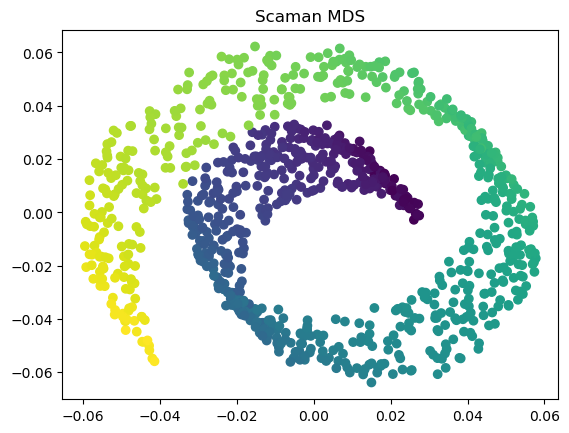

In [70]:
# Scaman MDS
scaman_mds = MDS(n_components=2,eig_method='slepc',slepc_solver='KRYLOVSCHUR')
X_mds_scaman = scaman_mds.fit_transform(X)
# Plot
plt.scatter(X_mds_scaman[:,0],X_mds_scaman[:,1],c=color)
plt.title('Scaman MDS')
plt.show()

/opt/homebrew/anaconda3/envs/scaman-env/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


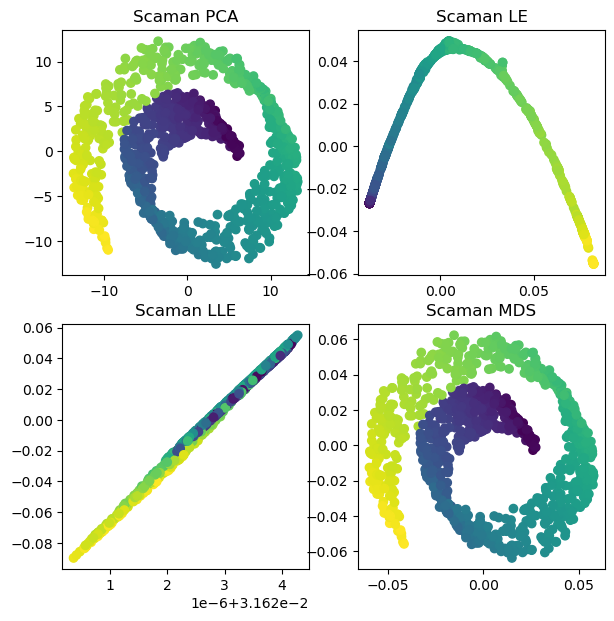

In [72]:
## Plot all X_pca_scaman,X_le_scaman, X_lle_scaman and X_mds scaman in a single plot

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.scatter(X_pca_scaman[:,0],X_pca_scaman[:,1],c=color)
plt.title('Scaman PCA')
plt.subplot(222)
plt.scatter(X_le_scaman[:,0],X_le_scaman[:,1],c=color)
plt.title('Scaman LE')
plt.subplot(223)
plt.scatter(X_lle_scaman[:,0],X_lle_scaman[:,1],c=color)
plt.title('Scaman LLE')
plt.subplot(224)
plt.scatter(X_mds_scaman[:,0],X_mds_scaman[:,1],c=color)
plt.title('Scaman MDS')
plt.show()

